<a href="https://colab.research.google.com/github/srichu143/srichu143/blob/main/GERMAN%20CREDIT%20RISK%20TCS%20(SRICHU)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

## Data Exploration and Preprocessing

In [2]:
file_path = '/content/german_credit_data.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
# Removing unwanted columns
to_be_droped = dataset.columns[0]
dataset.drop(columns=[to_be_droped], inplace = True)
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
dataset.isnull().sum()
# Null values are found in the columns 'Saving accounts' 'Checking account'

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [5]:
# Handling missing values in dataset
null_columns = dataset.columns[4:6]
dataset[null_columns[0]].fillna('no_info', inplace=True)
dataset[null_columns[1]].fillna('no_info', inplace=True)
dataset.isnull().sum()

<ipython-input-5-71a63edb9a3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[null_columns[0]].fillna('no_info', inplace=True)
<ipython-input-5-71a63edb9a3f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


In [6]:
# Preprocessing numerical and categorial columns
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_copy = dataset.copy()
num_cols = ['Age', 'Credit amount', 'Duration']
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

sc = StandardScaler()
df_copy[num_cols] = sc.fit_transform(df_copy[num_cols])

labels = {}
for col in cat_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    labels[col] = le

In [7]:
df_copy.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,1,2,1,2,0,-0.745131,-1.236478,5
1,-1.191404,0,2,1,0,1,0.949817,2.248194,5
2,1.183312,1,1,1,0,2,-0.416562,-0.738668,3
3,0.831502,1,2,0,0,0,1.634247,1.750384,4
4,1.535122,1,2,0,0,0,0.566664,0.256953,1


## Model Development

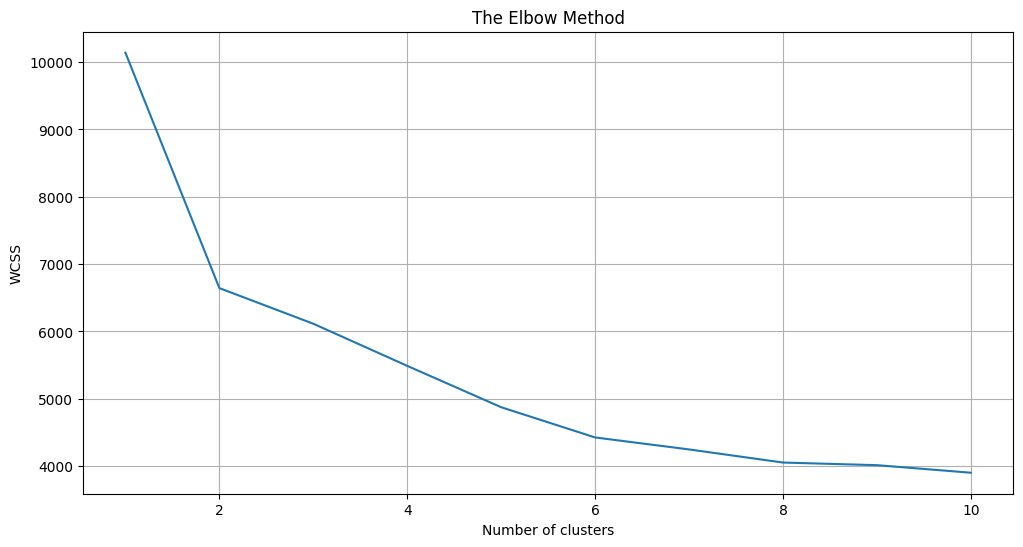

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_copy)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [9]:
model = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df_copy)
labels = model.labels_

In [10]:
dataset['Risk'] = labels

## Model Interpretation and Insights

In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_copy, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.32212688871349837


### Hyper parameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 500],
    'tol': [1e-4, 1e-3]
}

# Create KMeans model
kmeans = KMeans()

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid, cv=3, n_jobs=-1)
grid_search.fit(df_copy)

# Get best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 6, 'n_init': 10, 'tol': 0.0001}


In [13]:
model2 = KMeans(n_clusters = 2, init='k-means++', max_iter=300, n_init=20, tol=0.0001)
model2.fit(df_copy)
print("silhouette score: ", silhouette_score(df_copy, model2.labels_))

silhouette score:  0.3222845264255269
